# Worst Case

Inputs péssimps, métricas da rede ("rssi", "etx", "delay", "busy_fraction") muito ruins e estatísticas do RADNET ("apmr_edge", "mfsr_edge", "idg_global") baixas.

## Inputs

### Imports

In [44]:
import os
import pandas as pd
import numpy as np

### Parameters

In [45]:
num_samples = 70 # quantidade de exemplos

### Worst Inputs

In [46]:
edge_inputs = []

while len(edge_inputs) < num_samples:
    # Gerar sempre métricas ruins para edge inputs
    # Forçar pelo menos 2 métricas ruins por amostra
    
    # RSSI: sempre baixo (sinal fraco)
    rssi = np.random.uniform(-90, -60)  
    
    # ETX: tendência para alto (mais retransmissões)
    etx = np.random.uniform(4, 10)
    
    # Delay: tendência para alto
    delay = np.random.uniform(30, 100)
    
    # Busy fraction: tendência para alto (canal ocupado)
    busy_fraction = np.random.uniform(0.3, 1.0)
    
    # Adicionar algumas variações extremas
    extreme_factor = 0.3
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            rssi = np.random.uniform(-95, -85)  # RSSI muito baixo
        if np.random.random() < 0.5:
            etx = np.random.uniform(7, 10)      # ETX muito alto
        if np.random.random() < 0.5:
            delay = np.random.uniform(70, 100)  # Delay muito alto
        if np.random.random() < 0.5:
            busy_fraction = np.random.uniform(0.8, 1.0)  # Canal muito ocupado
    
    # Arredondar valores
    rssi = round(rssi, 1)
    etx = round(etx, 1)
    delay = round(delay)
    busy_fraction = round(busy_fraction, 2)
    
    edge_inputs.append([rssi, etx, delay, busy_fraction])

In [47]:
radnet_inputs = []

while len(radnet_inputs) < num_samples:
    # Gerar sempre métricas ruins para radnet
    # Cenários de alta mobilidade, muitos pares, rede congestionada
    
    # APMR: tendência baixa (prefixes ineficientes)
    apmr_edge = np.random.uniform(0.45, 0.65)
    
    # MFSR: tendência baixa (baixa taxa de sucesso)
    mfsr_edge = np.random.uniform(0.50, 0.70)
    
    # IDG: tendência baixa (entrega difícil em grupo)
    idg_global = np.random.uniform(0.45, 0.65)
    
    # Adicionar casos extremamente ruins
    extreme_factor = 0.25
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            apmr_edge = np.random.uniform(0.45, 0.55)  # APMR muito baixo
        if np.random.random() < 0.5:
            mfsr_edge = np.random.uniform(0.50, 0.60)  # MFSR muito baixo
        if np.random.random() < 0.5:
            idg_global = np.random.uniform(0.45, 0.55)  # IDG muito baixo
    
    # Garantir ranges válidos
    apmr_edge = max(0.45, min(0.70, apmr_edge))
    mfsr_edge = max(0.50, min(0.75, mfsr_edge))
    idg_global = max(0.45, min(0.70, idg_global))
    
    # Arredondar valores
    apmr_edge = round(apmr_edge, 6)
    mfsr_edge = round(mfsr_edge, 6)
    idg_global = round(idg_global, 2)
    
    radnet_inputs.append([apmr_edge, mfsr_edge, idg_global])

### Save

In [48]:
edges_input = pd.DataFrame(edge_inputs, columns=["rssi", "etx", "delay", "busy_fraction"])
os.makedirs("../inputs", exist_ok=True)
edges_input.to_csv("../inputs/edges_input.csv", index=False)

print("Edges Inputs salvo em ../datasets/edges_input.csv")

Edges Inputs salvo em ../datasets/edges_input.csv


In [49]:
radnet_input = pd.DataFrame(radnet_inputs, columns=["apmr_edge", "mfsr_edge", "idg_global"])
os.makedirs("../inputs", exist_ok=True)
radnet_input.to_csv("../inputs/radnet_input.csv", index=False)

print("Radnet Input salvo em ../datasets/radnet_input.csv")

Radnet Input salvo em ../datasets/radnet_input.csv


## Dataset

In [50]:
%run 2.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [51]:
%run 3.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.7183     0.4971       0.5152    
10       0.2890     0.9777       0.9764    
20       0.1176     0.9740       0.9740    
30       0.0713     0.9773       0.9778    
40       0.0566     0.9802       0.9807    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inference

In [52]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-68    6.0   44     0.40   0        Ruim     0.98      
-82    8.2   91     0.98   0        Ruim     1.00      
-69    7.2   59     0.82   0        Ruim     1.00      
-70    6.0   62     0.61   0        Ruim     1.00      
-70    6.9   76     0.96   0        Ruim     1.00      
-80    7.6   54     0.98   0        Ruim     1.00      
-81    5.1   71     0.34   0        Ruim     1.00      
-61    7.5   51     0.70   0        Ruim     1.00      
-61    4.1   64     0.37   0        Ruim     0.92      
-64    4.1   61     0.46   0        Ruim     0.98      
-77    9.9   92     0.95   0        Ruim     1.00      
-67    4.7   40     0.41   0        Ruim     0.92      
-66    6.3   41     0.85   0        Ruim     1.00      
-68    8.5   47     0.75   0        Ruim     1.00      
-64    7.5   77     0.66   0        Ruim     1.00      
-90    7.6   49     0.44   0        Ruim     1.0

## Fusion

In [53]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-68    6.0   44     0.40   0.54   0.55   0.64   0        Ruim     0.66      
-82    8.2   91     0.98   0.61   0.53   0.57   0        Ruim     0.66      
-69    7.2   59     0.82   0.58   0.50   0.46   0        Ruim     0.68      
-70    6.0   62     0.61   0.50   0.69   0.49   0        Ruim     0.65      
-70    6.9   76     0.96   0.53   0.68   0.58   0        Ruim     0.64      
-80    7.6   54     0.98   0.60   0.68   0.47   0        Ruim     0.63      
-81    5.1   71     0.34   0.46   0.64   0.46   0        Ruim     0.68      
-61    7.5   51     0.70   0.52   0.63   0.48   0        Ruim     0.66      
-61    4.1   64     0.37   0.52   0.55   0.61   0        Ruim     0.64      
-64    4.1   61     0.46   0.51   0.66   0.51   0        Ruim     0.65      
-77    9.9   92     0.95   0.54   0.54   0.45   0        Ruim     0.69      
-67  

## Kalman

In [54]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-68    6.0   44     0.40   0.54   0.55   0.64   0        Ruim     0.66      
-82    8.2   91     0.98   0.61   0.53   0.57   0        Ruim     0.66      
-69    7.2   59     0.82   0.58   0.50   0.46   0        Ruim     0.67      
-70    6.0   62     0.61   0.50   0.69   0.49   0        Ruim     0.66      
-70    6.9   76     0.96   0.53   0.68   0.58   0        Ruim     0.66      
-80    7.6   54     0.98   0.60   0.68   0.47   0        Ruim     0.65      
-81    5.1   71     0.34   0.46   0.64   0.46   0        Ruim     0.66      
-61    7.5   51     0.70   0.52   0.63   0.48   0        Ruim     0.66      
-61    4.1   64     0.37   0.52   0.55   0.61   0        Ruim     0.66      
-64    4.1   61     0.46   0.51   0.66   0.51   0        Ruim     0.65      
-77    9.9   92     0.95   0.54   0.54   0.45   0        Ruim     0.66      


## Results

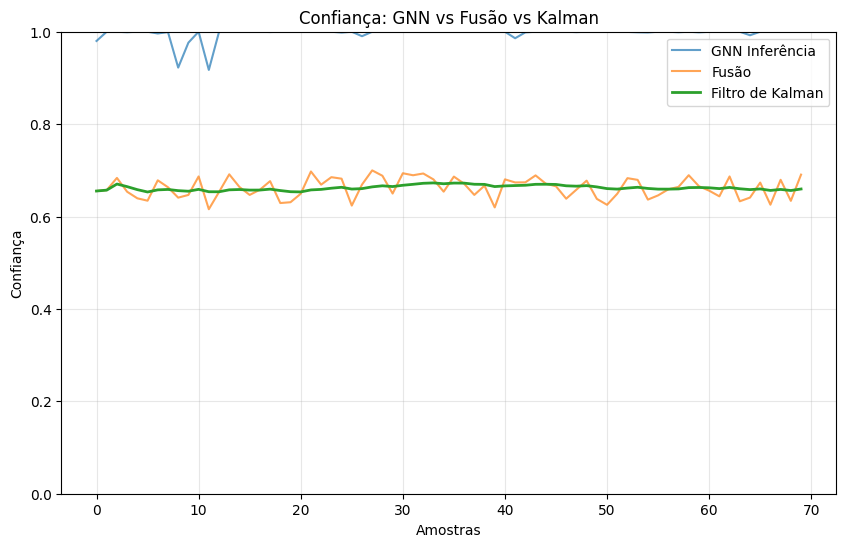

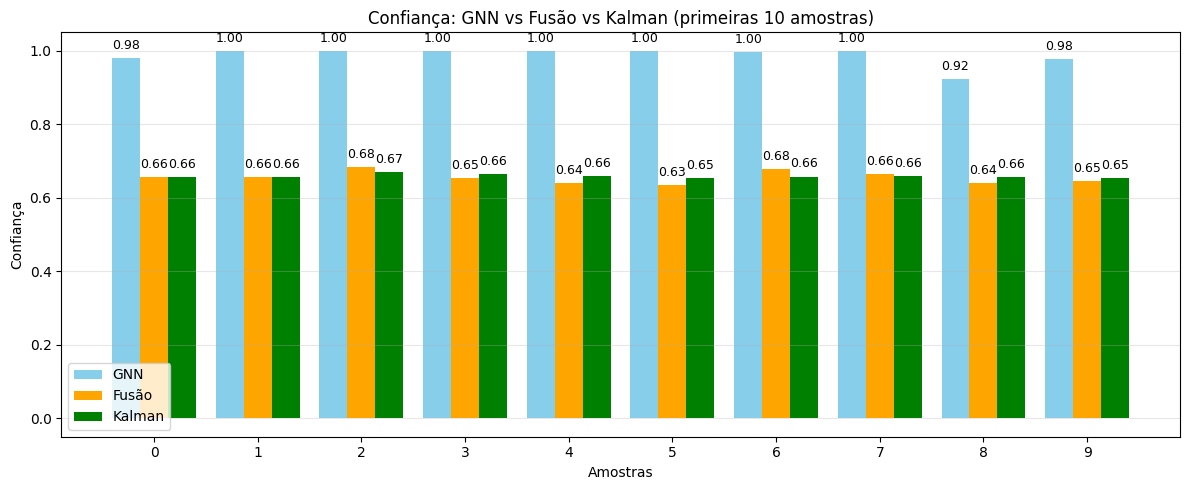

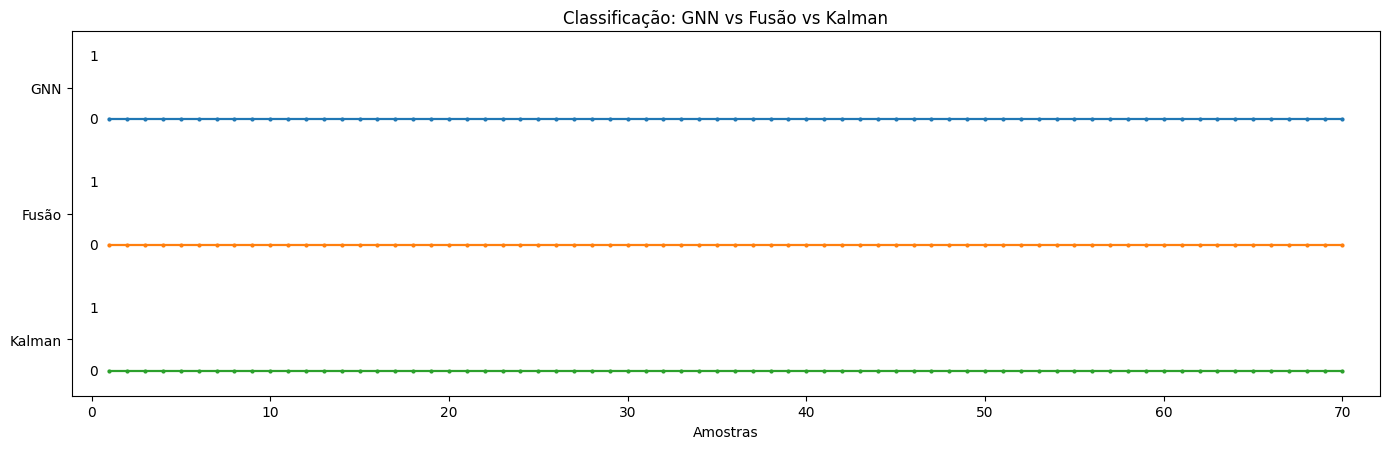

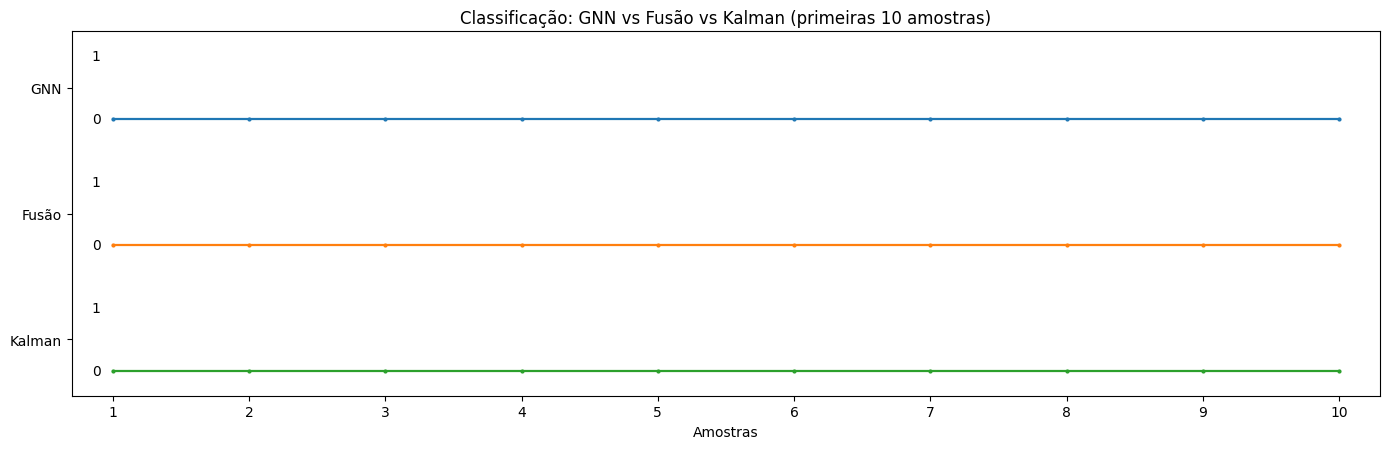

In [55]:
%run 7.results.ipynb

# Best Case

Inputs ótimos, métricas da rede ("rssi", "etx", "delay", "busy_fraction") quase perfeitas e estatísticas do RADNET ("apmr_edge", "mfsr_edge", "idg_global") excelentes.

## Inputs

### Imports

In [56]:
import os
import pandas as pd
import numpy as np

### Parameters

In [57]:
num_samples = 70 # quantidade de exemplos

### Best Inputs

In [58]:
edge_inputs = []

while len(edge_inputs) < num_samples:
    # Gerar sempre métricas boas para edge inputs
    
    # RSSI: sempre alto (sinal forte)
    rssi = np.random.uniform(-65, -30)  
    
    # ETX: tendência para baixo (poucas retransmissões)
    etx = np.random.uniform(1, 4)
    
    # Delay: tendência para baixo
    delay = np.random.uniform(1, 40)
    
    # Busy fraction: tendência para baixo (canal livre)
    busy_fraction = np.random.uniform(0, 0.4)
    
    # Adicionar algumas variações extremas boas
    extreme_factor = 0.3
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            rssi = np.random.uniform(-45, -30)  # RSSI muito alto
        if np.random.random() < 0.5:
            etx = np.random.uniform(1, 2)       # ETX muito baixo
        if np.random.random() < 0.5:
            delay = np.random.uniform(1, 20)    # Delay muito baixo
        if np.random.random() < 0.5:
            busy_fraction = np.random.uniform(0, 0.2)  # Canal muito livre
    
    # Arredondar valores
    rssi = round(rssi, 1)
    etx = round(etx, 1)
    delay = round(delay)
    busy_fraction = round(busy_fraction, 2)
    
    edge_inputs.append([rssi, etx, delay, busy_fraction])

In [59]:
radnet_inputs = []

while len(radnet_inputs) < num_samples:
    # Gerar sempre métricas boas para radnet
    # Cenários de baixa mobilidade, poucos pares, rede estável
    
    # APMR: tendência alta (prefixes eficientes)
    apmr_edge = np.random.uniform(0.75, 0.95)
    
    # MFSR: tendência alta (alta taxa de sucesso)
    mfsr_edge = np.random.uniform(0.80, 0.95)
    
    # IDG: tendência alta (entrega eficiente em grupo)
    idg_global = np.random.uniform(0.70, 0.90)
    
    # Adicionar casos extremamente bons
    extreme_factor = 0.25
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            apmr_edge = np.random.uniform(0.85, 0.95)  # APMR muito alto
        if np.random.random() < 0.5:
            mfsr_edge = np.random.uniform(0.88, 0.95)  # MFSR muito alto
        if np.random.random() < 0.5:
            idg_global = np.random.uniform(0.80, 0.90)  # IDG muito alto
    
    # Garantir ranges válidos
    apmr_edge = max(0.70, min(0.98, apmr_edge))
    mfsr_edge = max(0.75, min(0.98, mfsr_edge))
    idg_global = max(0.65, min(0.95, idg_global))
    
    # Arredondar valores
    apmr_edge = round(apmr_edge, 6)
    mfsr_edge = round(mfsr_edge, 6)
    idg_global = round(idg_global, 2)
    
    radnet_inputs.append([apmr_edge, mfsr_edge, idg_global])

### Save

In [60]:
edges_input = pd.DataFrame(edge_inputs, columns=["rssi", "etx", "delay", "busy_fraction"])
os.makedirs("../inputs", exist_ok=True)
edges_input.to_csv("../inputs/edges_input.csv", index=False)

print("Edges Inputs salvo em ../datasets/edges_input.csv")

Edges Inputs salvo em ../datasets/edges_input.csv


In [61]:
radnet_input = pd.DataFrame(radnet_inputs, columns=["apmr_edge", "mfsr_edge", "idg_global"])
os.makedirs("../inputs", exist_ok=True)
radnet_input.to_csv("../inputs/radnet_input.csv", index=False)

print("Radnet Input salvo em ../datasets/radnet_input.csv")

Radnet Input salvo em ../datasets/radnet_input.csv


## Dataset

In [62]:
%run 2.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [63]:
%run 3.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.8600     0.1283       0.1207    
10       0.5365     0.8739       0.9207    
20       0.2573     0.9711       0.9722    
30       0.1106     0.9722       0.9725    
40       0.0738     0.9746       0.9750    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inference

In [64]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-43    1.2   34     0.11   1        Bom      1.00      
-63    2.8   7      0.31   1        Bom      0.98      
-41    3.2   4      0.25   1        Bom      1.00      
-37    3.0   19     0.19   1        Bom      1.00      
-31    2.3   32     0.21   1        Bom      1.00      
-59    3.7   6      0.19   1        Bom      0.99      
-31    3.7   15     0.30   1        Bom      1.00      
-39    1.6   23     0.17   1        Bom      1.00      
-33    2.0   18     0.02   1        Bom      1.00      
-43    2.5   4      0.29   1        Bom      1.00      
-39    1.0   2      0.15   1        Bom      1.00      
-45    1.8   39     0.07   1        Bom      0.99      
-44    1.4   23     0.37   1        Bom      1.00      
-37    1.5   36     0.07   1        Bom      1.00      
-47    3.1   9      0.05   1        Bom      1.00      
-38    3.6   7      0.13   1        Bom      1.0

## Fusion

In [65]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-43    1.2   34     0.11   0.84   0.85   0.81   1        Bom      0.90      
-63    2.8   7      0.31   0.84   0.84   0.82   1        Bom      0.90      
-41    3.2   4      0.25   0.77   0.82   0.84   1        Bom      0.88      
-37    3.0   19     0.19   0.91   0.88   0.78   1        Bom      0.92      
-31    2.3   32     0.21   0.81   0.82   0.73   1        Bom      0.88      
-59    3.7   6      0.19   0.85   0.85   0.87   1        Bom      0.91      
-31    3.7   15     0.30   0.88   0.93   0.82   1        Bom      0.93      
-39    1.6   23     0.17   0.86   0.93   0.70   1        Bom      0.92      
-33    2.0   18     0.02   0.94   0.87   0.80   1        Bom      0.93      
-43    2.5   4      0.29   0.82   0.93   0.79   1        Bom      0.92      
-39    1.0   2      0.15   0.82   0.89   0.79   1        Bom      0.91      
-45  

## Kalman

In [66]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-43    1.2   34     0.11   0.84   0.85   0.81   1        Bom      0.90      
-63    2.8   7      0.31   0.84   0.84   0.82   1        Bom      0.90      
-41    3.2   4      0.25   0.77   0.82   0.84   1        Bom      0.89      
-37    3.0   19     0.19   0.91   0.88   0.78   1        Bom      0.90      
-31    2.3   32     0.21   0.81   0.82   0.73   1        Bom      0.89      
-59    3.7   6      0.19   0.85   0.85   0.87   1        Bom      0.90      
-31    3.7   15     0.30   0.88   0.93   0.82   1        Bom      0.90      
-39    1.6   23     0.17   0.86   0.93   0.70   1        Bom      0.91      
-33    2.0   18     0.02   0.94   0.87   0.80   1        Bom      0.91      
-43    2.5   4      0.29   0.82   0.93   0.79   1        Bom      0.91      
-39    1.0   2      0.15   0.82   0.89   0.79   1        Bom      0.91      


## Resuts

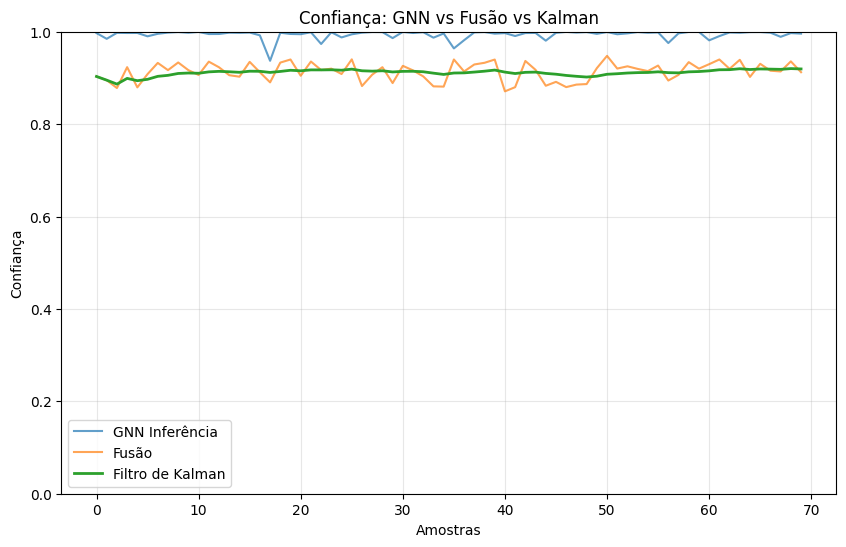

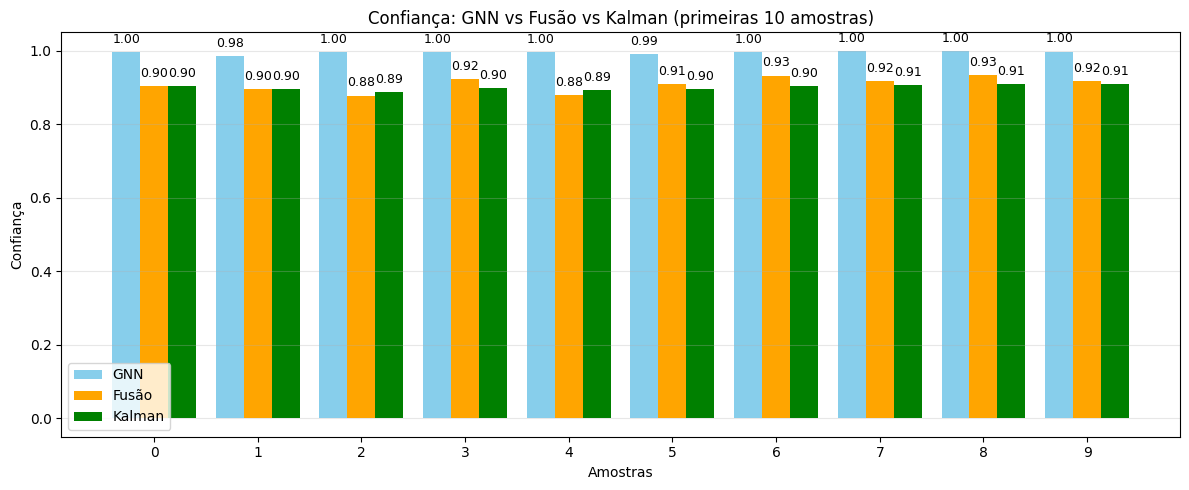

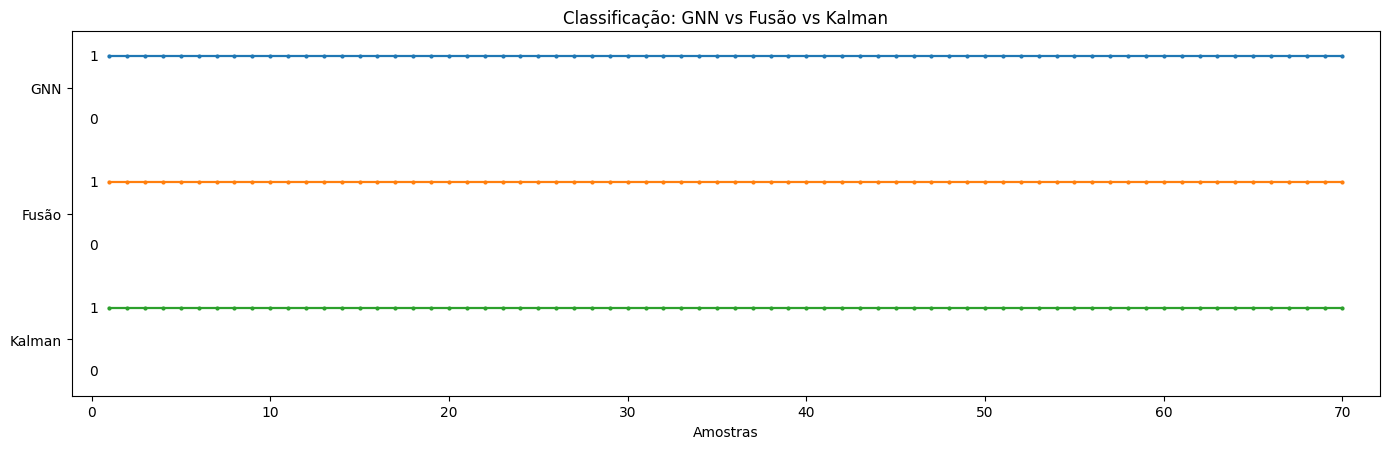

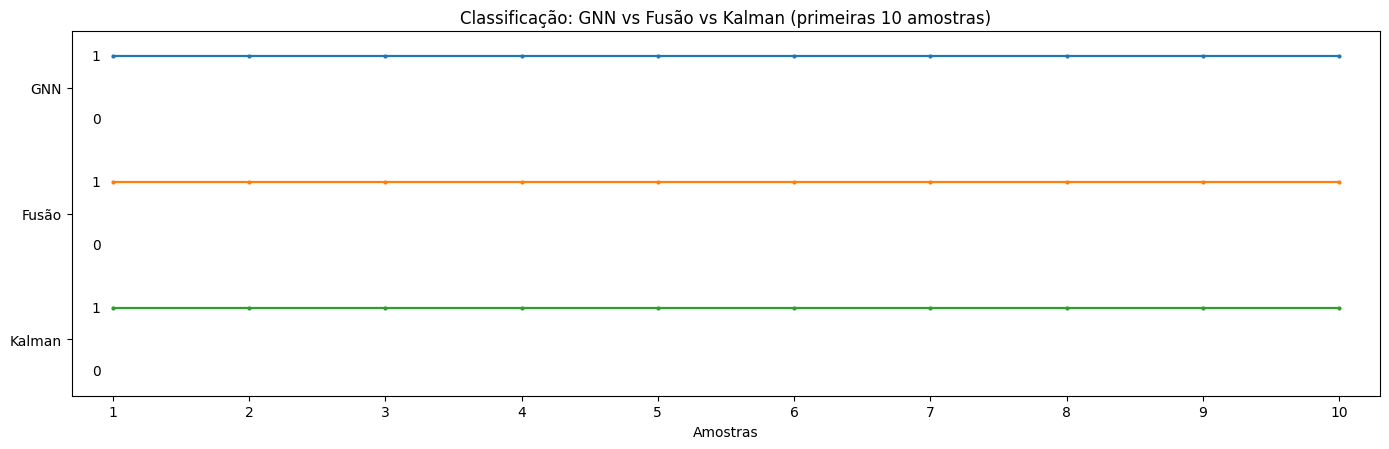

In [67]:
%run 7.results.ipynb